In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sodapy import Socrata
import datetime
import numpy as np
import matplotlib.dates as mdates
import data_processing as dp

In [52]:
"""
plot
Plots data with 7 day average

data: dataframe time series with column 'date' and data in 1st column
plot_color: Color to use for plot
label: string of plot label
rolling: Boolean, True to overlay 7-day average
"""
def plot(data, ax=None, plot_color="blue", label="", rolling=True):
    ax = ax or plt.gca()
    x, y0 = data.date, data.iloc[:,1]
    if(rolling):
        y1 = data.iloc[:,1].rolling(7).mean()
        ax.plot(x, y0, alpha=.3, color=plot_color)
        ax.plot(x, y1, color=plot_color)
        ax.fill_between(x, y1, 0, facecolor=plot_color, color=plot_color, alpha=0.2)
    else:
        ax.plot(x, y0, color=plot_color)
        ax.fill_between(x, y0, 0, facecolor=plot_color, color=plot_color, alpha=0.2)
    ax.title.set_text(label)
    # print(y0.iloc[-1])
    ax.text(x.iloc[len(x)//2], y0.max()*1.1, "{:,}".format(round(y0.iloc[-1], 1)))
    ax.set_ylim(0)
    fig.autofmt_xdate()
    return ax




/Users/jfleishhacker/GitHub/covid-twitter-bot/data_processing.py:220: RuntimeWarning: invalid value encountered in float_scalars
  newRow = {"date": curr_date, "test_positivity": test_positivity}


2021-07-24 00:00:00


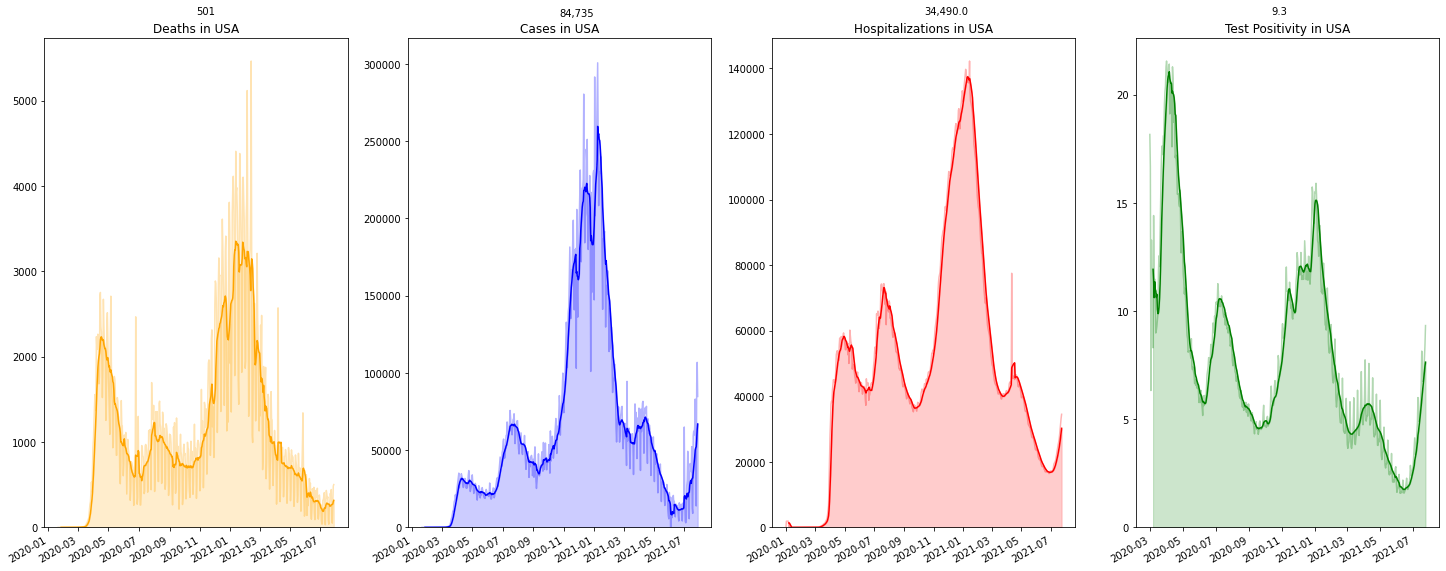

In [53]:
us_pos = dp.get_us_positivity()
us_case = dp.get_us_cases()
us_death = dp.get_us_deaths()
us_hosp = dp.get_us_hospitalizations()
ca_fa_cases = dp.get_state_cases(["FL", "CA"])

fig, axs = plt.subplots(1,4, figsize=(25,10))

plot(us_death, axs[0], plot_color="orange", label='Deaths in USA')
plot(us_case, axs[1], plot_color="blue", label='Cases in USA')
plot(us_hosp, axs[2], plot_color="red", label='Hospitalizations in USA')
plot(us_pos, axs[3], plot_color="green", label='Test Positivity in USA')
plt.show()
# plot(us_pos, "red", "Test positivity in USA")
# plot(us_death, "green", "Deaths in USA")
# plot(us_hosp, "orange", "Hospitalizations in USA", False)

TODO:

-Add 4 part plot
-Make it so all 4 visualizations can be initialized with one function call

In [2]:
dp.get_us_hospitalizations()

2021-07-24 00:00:00


,date,inpatient_beds_used_covid
0,2020-01-01,0.0
1,2020-01-02,1877.0
2,2020-01-03,1877.0
3,2020-01-04,1877.0
4,2020-01-05,1877.0
...,...,...
565,2021-07-19,28582.0
566,2021-07-20,30462.0
567,2021-07-21,31817.0
568,2021-07-22,33303.0
